### Least Absolute Shrinkage and Selection Operator

 instead of penalizing the sum of the squared coefficients (like ridge regression), we penalize the sum of the absolute values of the coefficients. The objective function for lasso becomes:

Cost function = Sum of squared errors + 𝜆 * ∑∣𝛽𝑗∣


Lasso not only shrinks the coefficients (like ridge) but also has the ability to force some coefficients to become exactly zero. This effectively means that lasso can perform automatic feature selection / dimensionality reduction by excluding irrelevant or less important features from the model entirely.

Just like ridge, lasso introduces bias into the model by shrinking the coefficients, but in return, it reduces variance and improves the generalization of the model on unseen data.   

The main advantage is that lasso can produce a simpler, more interpretable model because it can exclude irrelevant features, which makes it especially useful when: 
* You have many features, but only a few are likely to be important.
* You want to simplify your model by focusing on the most impactful predictors.


### Effect of λ

* When 
λ=0, lasso regression is the same as ordinary least squares (OLS) regression — all features are kept, and no coefficients are shrunk to zero.
As 

* λ increases, more and more coefficients are shrunk toward zero, and some become exactly zero.
If 
𝜆
* λ is very large, lasso may shrink all coefficients to zero, which means no features are selected, and the model is underfitting.


Why Lasso can force sparsity and not Ridge ?  
Both the absolute value penalty in lasso and the squared penalty in ridge indeed have their minimum at zero, which might lead you to think that both could drive coefficients to zero. However, ridge regression rarely forces coefficients to be exactly zero.  

idge regression (L2 regularization) applies a continuous shrinkage. The larger 
λ becomes, the more the coefficients are shrunk closer to zero, but they never become exactly zero unless 
λ is extremely large (leading to very small, but not exactly zero coefficients). The penalty in ridge regression is "smooth" due to the squared terms, which means it gradually reduces the coefficients but doesn't make them exactly zero.

* In ridge regression, the constraint forms a circular or elliptical shape (since the penalty is based on squares of the coefficients).

* In lasso regression, the constraint forms a diamond shape (due to the absolute value penalty). This diamond has sharp edges and corners. When minimizing the objective function under this diamond-shaped constraint, the solution often falls on one of these corners, which corresponds to one or more coefficients being exactly zero.

In [1]:
# Importing libraries 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

In [2]:
# Lasso Regression 
class LassoRegression(): 
    def __init__(self, learning_rate, iterations, l1_penalty): 
        self.learning_rate = learning_rate 
        self.iterations = iterations 
        self.l1_penalty = l1_penalty 
  
    # Function for model training 
    def fit(self, X, Y): 
        # no_of_training_examples, no_of_features 
        self.m, self.n = X.shape 
        # weight initialization 
        self.W = np.zeros(self.n) 
        self.b = 0
        self.X = X 
        self.Y = Y 
        # gradient descent learning 
        for i in range(self.iterations): 
            self.update_weights() 
        return self
  
    # Helper function to update weights in gradient descent 
    def update_weights(self): 
        Y_pred = self.predict(self.X) 
        # calculate gradients 
        dW = np.zeros(self.n) 
        for j in range(self.n): 
            if self.W[j] > 0: 
                dW[j] = (-2 * (self.X[:, j]).dot(self.Y - Y_pred) +
                         self.l1_penalty) / self.m 
            else: 
                dW[j] = (-2 * (self.X[:, j]).dot(self.Y - Y_pred) -
                         self.l1_penalty) / self.m 
  
        db = -2 * np.sum(self.Y - Y_pred) / self.m 
  
        # update weights 
        self.W = self.W - self.learning_rate * dW 
        self.b = self.b - self.learning_rate * db 
        return self
  
    # Hypothetical function h(x) 
    def predict(self, X): 
        return X.dot(self.W) + self.b 


Predicted values:  [ 40852.72 123048.99  65137.98]
Real values:       [ 37731 122391  57081]
Trained W:         26061.72
Trained b:         76471.1


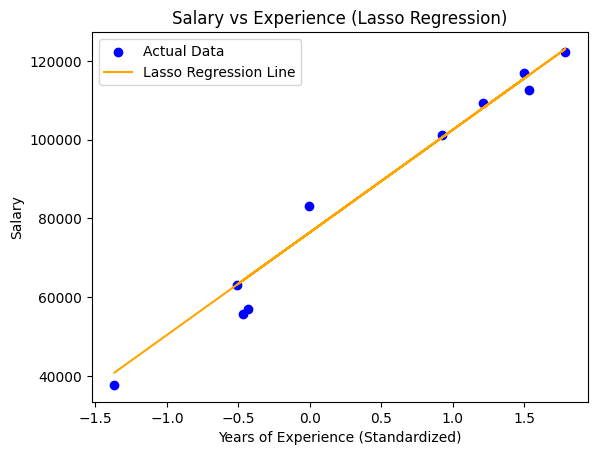

In [4]:

# Driver code
def main(): 
    # Importing dataset 
    df = pd.read_csv("salary_data.csv") 
    X = df.iloc[:, :-1].values 
    Y = df.iloc[:, 1].values 
  
    # Standardize features 
    scaler = StandardScaler() 
    X = scaler.fit_transform(X) 
  
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split( 
        X, Y, test_size=1/3, random_state=0) 
  
    # Model training 
    model = LassoRegression( 
        iterations=1000, learning_rate=0.01, l1_penalty=500) 
    model.fit(X_train, Y_train) 
  
    # Prediction on test set 
    Y_pred = model.predict(X_test) 
  
    print("Predicted values: ", np.round(Y_pred[:3], 2)) 
    print("Real values:      ", Y_test[:3]) 
    print("Trained W:        ", round(model.W[0], 2)) 
    print("Trained b:        ", round(model.b, 2)) 
  
    # Visualization on test set 
    plt.scatter(X_test, Y_test, color='blue', label='Actual Data') 
    plt.plot(X_test, Y_pred, color='orange', label='Lasso Regression Line') 
    plt.title('Salary vs Experience (Lasso Regression)') 
    plt.xlabel('Years of Experience (Standardized)') 
    plt.ylabel('Salary') 
    plt.legend() 
    plt.show() 
  
  
if __name__ == "__main__": 
    main() 
